Git submission

In [1]:
from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))

Mounted at /content/gdrive
['.git', 'Colab Notebooks', 'Flicker8k_Dataset', 'German', 'Image Processing', 'ImageCaptioning', '__pycache__', 'additional_homework', 'data_loader.py', 'datasets', 'descriptions.txt', 'epam', 'features256.pkl', 'features4096.pkl', 'homework_09', 'homework_10', 'model.png', 'model.py', 'my_checkpoint.pth.tar', 'my_checkpoint_train_data.pth.tar', 'output', 'project_files', 'runs', 'save.txt', 'save.txt.pub', 'test.pkl', 'text', 'torch_mapping.pkl', 'train.pkl']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
from os import listdir
from pickle import dump
import torch
import torch.nn as nn
import torchvision.models as models
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input
import pickle
from tqdm import tqdm
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from data_loader import get_loader
from model import DecoderRNN


In [3]:
def extract_features(directory, embed_size = 256):

	model = VGG16()

	model = Model(inputs=model.inputs, outputs=model.layers[-4].output)


	features = {}

	for name in listdir(directory):
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		image = img_to_array(image)
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		image = preprocess_input(image)
		feature = model.predict(image, verbose=0)
		linear_layer = Dense(embed_size, activation=None)(feature)
		image_id = name.split('.')[0]
		features[image_id] = linear_layer
		print('>%s' % name)
	return features

In [4]:
# directory = 'Flicker8k_Dataset'
# features = extract_features(directory)
# print('Extracted Features: %d' % len(features))
# #save to file
# dump(features, open('features.pkl', 'wb'))

In [5]:
with open('features4096.pkl', 'rb') as f:
    data = pickle.load(f)
torch_mapping = {}
for i in data:
  torch_mapping[i] = torch.from_numpy(data[i])

dump(torch_mapping, open('torch_mapping.pkl', 'wb'))


In [6]:
with open('torch_mapping.pkl', 'rb') as f:
    mappings = pickle.load(f)

#Train test split


In [7]:
split = int(len(mappings) * 0.9)
keys = list(mappings.keys())
train_keys = keys[:split]
test_keys = keys[split:]

train = {key: mappings[key] for key in train_keys}
test = {key: mappings[key] for key in test_keys}

dump(train, open('train.pkl', 'wb'))

#Check the size of the features

In [8]:
len(mappings["1358089136_976e3d2e30"]) # size is (1,4096)
features_shape = mappings["1358089136_976e3d2e30"][0].shape[0]
print(len(mappings["1358089136_976e3d2e30"][0]))

4096


# Bring the captions file to the right format

Using it only one time to create a file out of the original data to make it work for our dataloader

In [8]:

# import pandas as pd

# file_path = "text/Flickr8k.token.txt"
# captions_df = pd.read_csv(file_path, sep='\t', names=['image_id', 'captions'])

# captions_df['image'] = captions_df['image_id'].str.split('.').str[0]

# captions_df = captions_df[['image', 'captions']]

# output_path = "text/captions.csv"
# captions_df.to_csv(output_path, index=False)

# captions_df.head()


# Training

In [6]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import tensorflow as tf
import datetime
!rm -rf ./logs/

Epoch [1/100], Loss: 4.5567


Epoch [2/100], Loss: 3.8859


Epoch [3/100], Loss: 3.6073


Epoch [4/100], Loss: 3.4273


Epoch [5/100], Loss: 3.2921


Epoch [6/100], Loss: 3.1837


Epoch [7/100], Loss: 3.0897


Epoch [8/100], Loss: 3.0100


Epoch [9/100], Loss: 2.9388


Epoch [10/100], Loss: 2.8761
=> Saving checkpoint


Epoch [11/100], Loss: 2.8164


Epoch [12/100], Loss: 2.7632


Epoch [13/100], Loss: 2.7121


Epoch [14/100], Loss: 2.6673


Epoch [15/100], Loss: 2.6240


Epoch [16/100], Loss: 2.5821


Epoch [17/100], Loss: 2.5432


Epoch [18/100], Loss: 2.5069


Epoch [19/100], Loss: 2.4724


Epoch [20/100], Loss: 2.4383
=> Saving checkpoint


Epoch [21/100], Loss: 2.4090


Epoch [22/100], Loss: 2.3802


Epoch [23/100], Loss: 2.3508


Epoch [24/100], Loss: 2.3240


Epoch [25/100], Loss: 2.2978


Epoch [26/100], Loss: 2.2737


Epoch [27/100], Loss: 2.2493


Epoch [28/100], Loss: 2.2279


Epoch [29/100], Loss: 2.2041


Epoch [30/100], Loss: 2.1824
=> Saving checkpoint


Epoch [31/100], Loss: 2.1647


Epoch [32/100], Loss: 2.1428


Epoch [33/100], Loss: 2.1242


Epoch [34/100], Loss: 2.1080


Epoch [35/100], Loss: 2.0858


Epoch [36/100], Loss: 2.0728


Epoch [37/100], Loss: 2.0551


Epoch [38/100], Loss: 2.0380


Epoch [39/100], Loss: 2.0218


Epoch [40/100], Loss: 2.0066
=> Saving checkpoint


Epoch [41/100], Loss: 1.9921


Epoch [42/100], Loss: 1.9783


Epoch [43/100], Loss: 1.9646


Epoch [44/100], Loss: 1.9488


Epoch [45/100], Loss: 1.9353


Epoch [46/100], Loss: 1.9230


Epoch [47/100], Loss: 1.9094


Epoch [48/100], Loss: 1.8986


Epoch [49/100], Loss: 1.8835


Epoch [50/100], Loss: 1.8745
=> Saving checkpoint


Epoch [51/100], Loss: 1.8593


Epoch [52/100], Loss: 1.8530


Epoch [53/100], Loss: 1.8391


Epoch [54/100], Loss: 1.8305


Epoch [55/100], Loss: 1.8169


Epoch [56/100], Loss: 1.8081


Epoch [57/100], Loss: 1.7978


Epoch [58/100], Loss: 1.7877


Epoch [59/100], Loss: 1.7769


Epoch [60/100], Loss: 1.7670
=> Saving checkpoint


Epoch [61/100], Loss: 1.7580


Epoch [62/100], Loss: 1.7484


Epoch [63/100], Loss: 1.7429


Epoch [64/100], Loss: 1.7347


Epoch [65/100], Loss: 1.7243


Epoch [66/100], Loss: 1.7182


Epoch [67/100], Loss: 1.7072


Epoch [68/100], Loss: 1.6986


Epoch [69/100], Loss: 1.6917


Epoch [70/100], Loss: 1.6816
=> Saving checkpoint


Epoch [71/100], Loss: 1.6760


Epoch [72/100], Loss: 1.6706


Epoch [73/100], Loss: 1.6622


Epoch [74/100], Loss: 1.6540


Epoch [75/100], Loss: 1.6510


Epoch [76/100], Loss: 1.6391


Epoch [77/100], Loss: 1.6335


Epoch [78/100], Loss: 1.6256


Epoch [79/100], Loss: 1.6194


Epoch [80/100], Loss: 1.6142
=> Saving checkpoint


Epoch [81/100], Loss: 1.6097


Epoch [82/100], Loss: 1.5984


Epoch [83/100], Loss: 1.5969


Epoch [84/100], Loss: 1.5879


Epoch [85/100], Loss: 1.5836


Epoch [86/100], Loss: 1.5757


Epoch [87/100], Loss: 1.5727


Epoch [88/100], Loss: 1.5647


Epoch [89/100], Loss: 1.5591


Epoch [90/100], Loss: 1.5542
=> Saving checkpoint


Epoch [91/100], Loss: 1.5472


Epoch [92/100], Loss: 1.5443


Epoch [93/100], Loss: 1.5367


Epoch [94/100], Loss: 1.5325


Epoch [95/100], Loss: 1.5263


Epoch [96/100], Loss: 1.5266


Epoch [97/100], Loss: 1.5152


Epoch [98/100], Loss: 1.5091


Epoch [99/100], Loss: 1.5080


Epoch [100/100], Loss: 1.5018


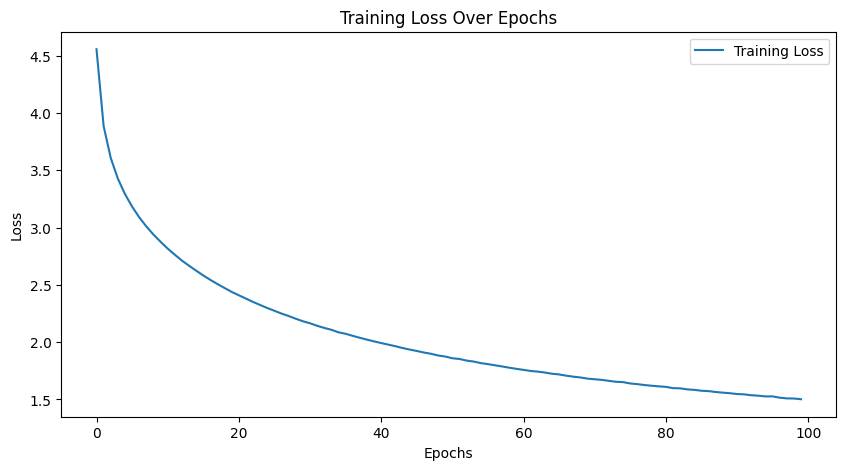

In [13]:
def save_checkpoint(state, filename="my_checkpoint_train_data.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

def train():

    train_loader, dataset = get_loader(
        root_folder="train.pkl",
        annotation_file="text/captions.csv",
        num_workers=2,
    )

    torch.backends.cudnn.benchmark = True
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    load_model = False
    save_model = True
    train_CNN = False

    embed_size = 256
    hidden_size = 256
    vocab_size = len(dataset.vocab)
    num_layers = 1
    learning_rate = 3e-4
    num_epochs = 100

    writer = SummaryWriter("runs/flickr")
    step = 0

    model = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.word_to_index["<pad>"])
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    loss_history = []
    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0
        if save_model and epoch%10 == 0 and epoch !=0:
            checkpoint = {
                "state_dict": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "step": step,
            }
            save_checkpoint(checkpoint)

        for idx, (imgs, captions) in tqdm(
            enumerate(train_loader), total=len(train_loader), leave=False
        ):
            imgs = imgs.to(device)
            captions = captions.to(device)

            outputs = model(imgs, captions[:-1])
            loss = criterion(
                outputs.reshape(-1, outputs.shape[2]), captions.reshape(-1)
            )

            writer.add_scalar("Training loss", loss.item(), global_step=step)
            step += 1

            optimizer.zero_grad()
            loss.backward(loss)
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(loss_history, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    train()

# Load the model

In [9]:
train_loader, dataset = get_loader(
        root_folder="train.pkl",
        annotation_file="text/captions.csv",
        num_workers=2,
    )
embed_size = 256
hidden_size = 256
vocab_size = len(dataset.vocab)
num_layers = 1
learning_rate = 3e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # initialize model, loss etc
model = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
def load_checkpoint(checkpoint, model, optimizer):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])
    step = checkpoint["step"]
    return step

In [11]:
my_model = load_checkpoint(torch.load("my_checkpoint_train_data.pth.tar"), model, optimizer)

<ipython-input-11-5fcaea3ad62c>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  my_model = load_checkpoint(torch.load("my_checkpoint_train_data.pth.tar"), model, optimizer)

=> Loading checkpoint


In [12]:
test_images = test
test_keys = list(test_images.keys())
print(test_keys)

['1417295167_5299df6db8', '1417941060_2a0f7908bc', '1417882092_c94c251eb3', '141755292_7a0b3364cf', '1408958345_68eea9a4e4', '140526327_3cb984de09', '1405221276_21634dcd58', '1417637704_572b4d6557', '1414820925_3504c394e1', '1417031097_ab656bc4bd', '141140165_9002a04f19', '1413956047_c826f90c8b', '1415591512_a84644750c', '1418019748_51c7d59c11', '141755290_4b954529f3', '1410193619_13fff6c875', '1419286010_b59af3962a', '1425485485_d7c97a5470', '1425069590_570cc7c2d8', '1428641354_f7453afbea', '1419385780_1383ec7ba9', '1423126855_6cd2a3956c', '142802798_962a4ec5ce', '1428681303_04213524e3', '1429723917_6af585e4c0', '1427391496_ea512cbe7f', '1425919702_ddb761aeec', '1423997242_ea2189ec5e', '1429814475_0b592b9995', '1426014905_da60d72957', '1428578577_82864facae', '1429546659_44cb09cbe2', '1420060020_7a6984e2ea', '1420060118_aed262d606', '1424237335_b3be9920ba', '1424775129_ffea9c13ab', '1425013325_bff69bc9da', '1425069308_488e5fcf9d', '1433577867_39a1510c43', '143680442_2f03f76944', '1432

# Calculating BLEU score

Create original and predicted pairs

get the first original caption for test images

In [58]:
def split_by_first_space(line):
    image_id, caption = line.split(" ", 1)
    return image_id, caption.strip()


with open("descriptions.txt", "r") as file:
    data = [split_by_first_space(line) for line in file]

captions_df = pd.DataFrame(data, columns=["image_id", "caption"])

original_captions = {}

for i in test_keys:
    if i in captions_df['image_id'].values:

        original_captions[i] = captions_df.loc[captions_df['image_id'] == i, 'caption'].iloc[0]

In [59]:

predicted_captions = {}

predicted_captions = {key: model.caption_image(test[key], dataset.vocab) for key in test_keys}
model.train()

DecoderRNN(
  (sq): Linear(in_features=4096, out_features=256, bias=True)
  (embed): Embedding(2776, 256, padding_idx=0)
  (lstm): LSTM(256, 256)
  (linear): Linear(in_features=256, out_features=2776, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [60]:
print(predicted_captions)
print(original_captions)
print(len(predicted_captions))
print(len(original_captions))

{'1417295167_5299df6db8': ['<start>', 'the', 'girl', 'wearing', 'red', 'shirt', 'and', 'blue', 'hat', 'smiles', '<end>'], '1417941060_2a0f7908bc': ['<start>', 'there', 'are', 'two', 'boys', 'one', 'wearing', 'black', 'shirt', 'and', 'tan', 'shorts', '<end>'], '1417882092_c94c251eb3': ['<start>', 'the', 'man', 'the', 'black', 'shirt', 'has', 'the', '<unk>', '<unk>', 'the', 'football', '<end>'], '141755292_7a0b3364cf': ['<start>', 'two', 'young', 'girls', 'are', 'playing', '<unk>', '<unk>', 'and', '<unk>', '<end>'], '1408958345_68eea9a4e4': ['<start>', 'young', 'girl', 'wearing', 'pink', 'bathing', 'suit', 'walks', 'down', 'the', 'water', '<end>'], '140526327_3cb984de09': ['<start>', 'man', 'standing', 'the', 'foot', 'the', 'water', 'looking', 'the', 'mountains', '<end>'], '1405221276_21634dcd58': ['<start>', 'two', 'dogs', 'are', 'playing', 'the', 'grass', '<end>'], '1417637704_572b4d6557': ['<start>', 'two', 'boys', 'are', 'wearing', 'blue', 'and', 'yellow', 'striped', 'shirt', '<end>'

In [61]:
# from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

# for ref, cand in zip(original_captions, predicted_captions):
#     score = sentence_bleu([ref], cand)  # Pass cand directly as it's already a list of words
#     print(f"BLEU Score: {score:.4f}")
# corpus_score = corpus_bleu([[ref] for ref in original_captions], predicted_captions)  # Pass predicted_captions directly
# print(f"Corpus BLEU Score: {corpus_score:.4f}")

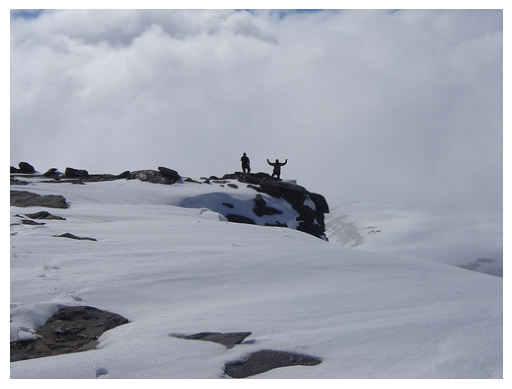

Original Caption: two hikers wearing dark clothes rest on snow covered peak
Predicted Caption: <start> group people are hiking the snow <end>


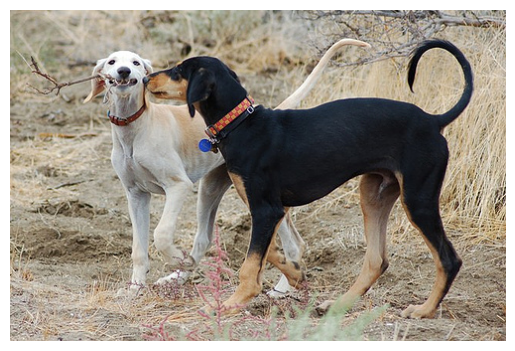

Original Caption: white dog and black dog in field
Predicted Caption: <start> white dog and black dog are standing beside each other the grass <end>


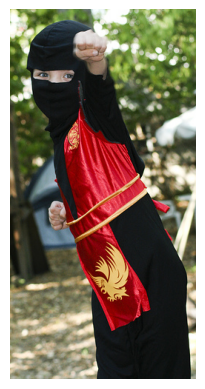

Original Caption: boy wears ninja suit and strikes pose
Predicted Caption: <start> young woman wearing red scarf and scarf <end>


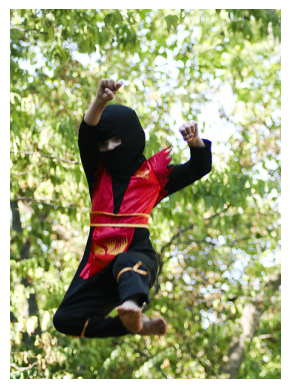

Original Caption: child dressed as ninja is jumping through the air under large tree
Predicted Caption: <start> boy red shirt jumping off blue and red and blue jeans <end>


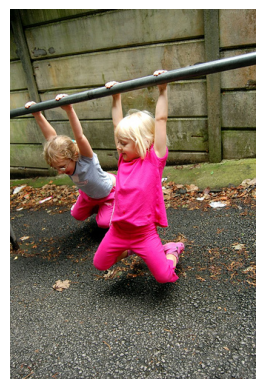

Original Caption: two children hang from metal bar close to the ground
Predicted Caption: <start> young girl pink shirt swinging the air playground <end>


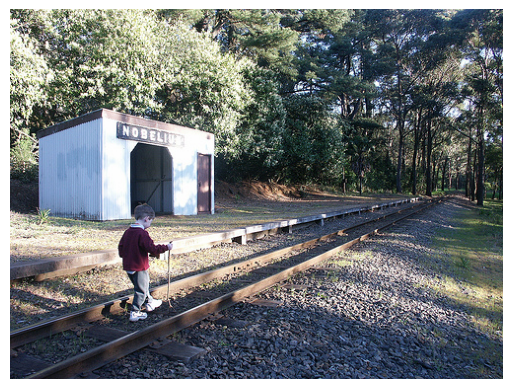

Original Caption: little boy walking on railroad tracks
Predicted Caption: <start> boy yellow shirt and shorts standing the middle the stairs <end>


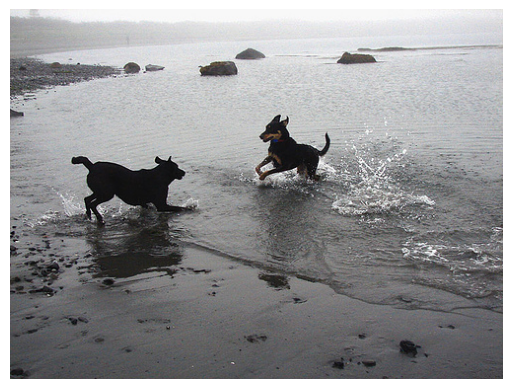

Original Caption: two big german shephard dogs play in the water
Predicted Caption: <start> two dogs play the sand <end>


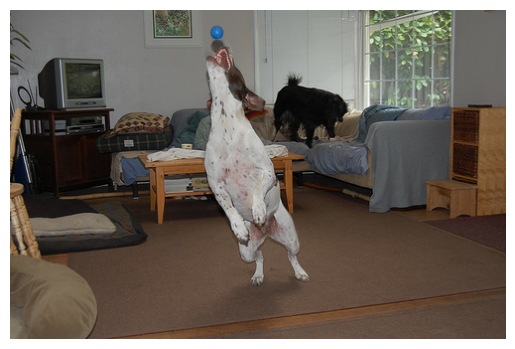

Original Caption: dog on two legs with its mouth opened toward blue ball in the air
Predicted Caption: <start> dog jumps get toy <end>


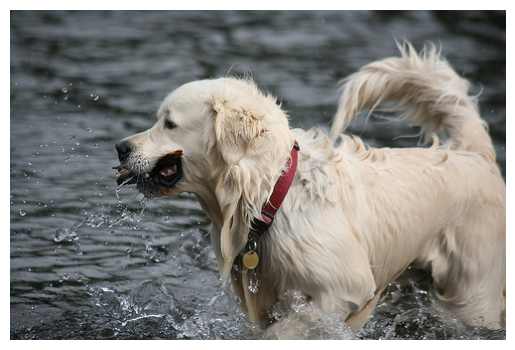

Original Caption: wet white dog is splashing in the water with stick in its mouth
Predicted Caption: <start> dog with red collar plays the pond <end>


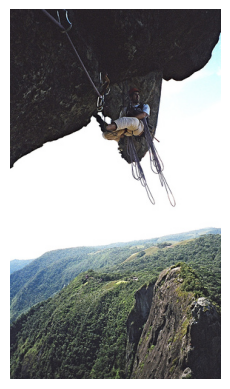

Original Caption: climber is suspended on an overhang that overlooks tree covered hill
Predicted Caption: <start> man performs trick high the air while the man the background <end>


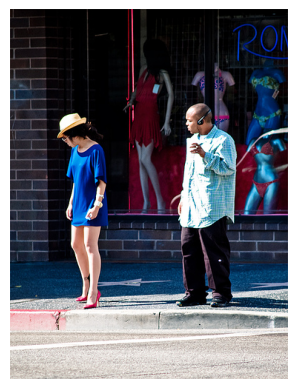

Original Caption: man and woman are standing on the curb
Predicted Caption: <start> japanese girl <unk> <unk> and <unk> <end>


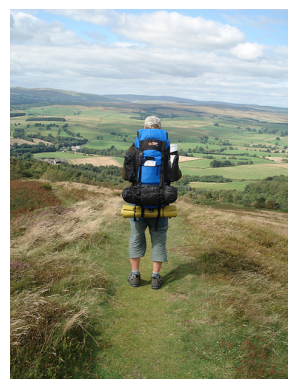

Original Caption: man is carrying large backpack and looking over some green fields
Predicted Caption: <start> man carries backpack walks through the dirt road <end>


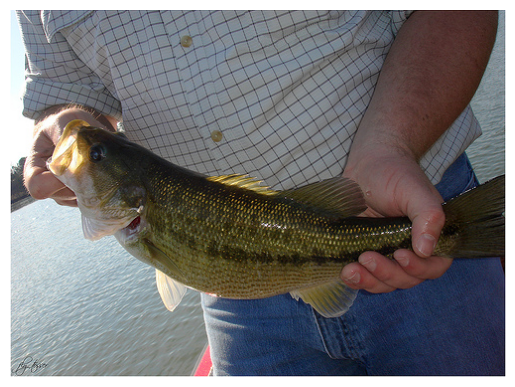

Original Caption: man holding fish
Predicted Caption: <start> boy the back <unk> <unk> for <unk> <end>


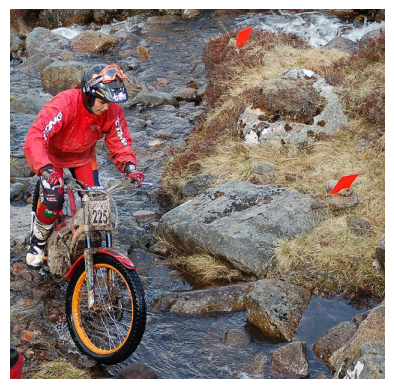

Original Caption: boy in black helmet and red long sleeve shirt rides his motorbike over rocky stream
Predicted Caption: <start> man red helmet riding bike <end>


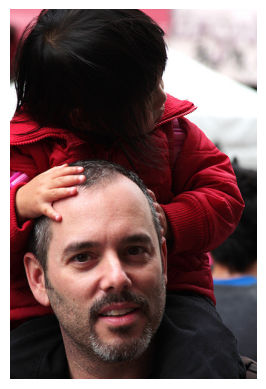

Original Caption: child rides on man shoulders
Predicted Caption: <start> girl and navy police officer <end>


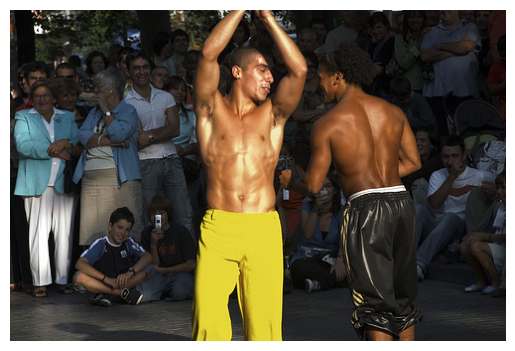

Original Caption: crowd is watching shirtless men one in yellow pants and one in black shorts perfom
Predicted Caption: <start> man wearing brown hat and white striped shirt raising his arms amongst crowd <end>


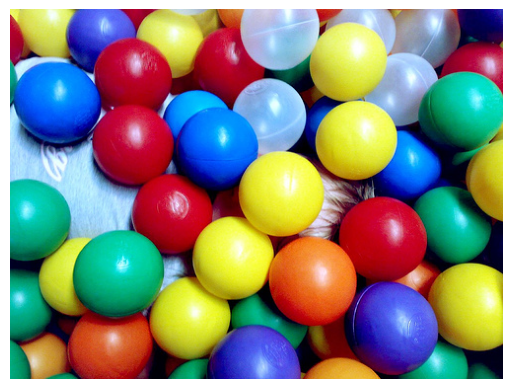

Original Caption: baby lies almost completely covered by bright colored plastic balls
Predicted Caption: <start> young girl dances mat <end>


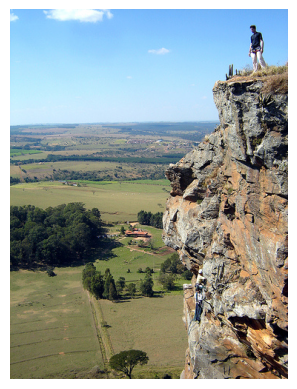

Original Caption: man standing on cliff
Predicted Caption: <start> man with shirt <unk> rock formation <end>


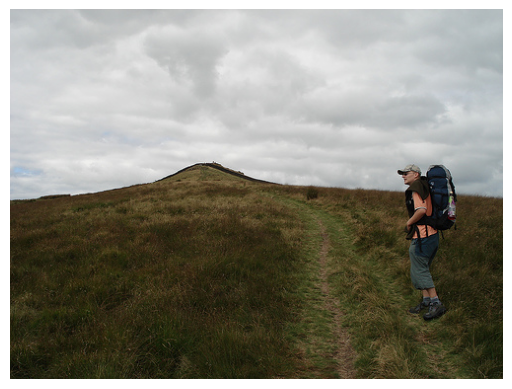

Original Caption: hiker is walking treeless path up hill
Predicted Caption: <start> man with <unk> <unk> and backpack jumps over hill <end>


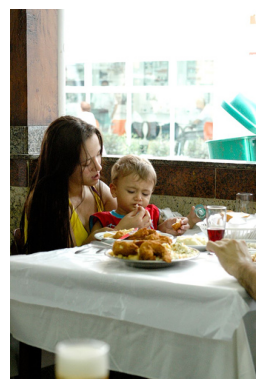

Original Caption: mother helps her little boy eat his food by feeding him by hand
Predicted Caption: <start> two women sit table with <unk> <unk> <end>


In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

some_test_examples = test_keys[30:50]
for i in some_test_examples:
    image_path = f"Flicker8k_Dataset/{i}.jpg"
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')  # Turn off the axis for better visualization
    plt.show()
    print("Original Caption:", original_captions[i])
    print("Predicted Caption:", " ".join(predicted_captions[i]))
